In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

h_eV = 4.135667696e-15 #Planck's constant eV*s
Hz_to_GeV = 4.136e-24

freqs = 6.011e9
ff = 0.22 #form factor, assuming randomly polarized DP

# Relevant mass ranges

In [3]:
def mass_ueV_to_freq_GHz(mass_ueV):
    ''' turns axion mass to photon frequency '''
    return mass_ueV/h_eV*1e-15

def freq_to_mass(compton_f):
    ''' turns photon frequency into axion mass in units of eV '''
    return h_eV*compton_f
 
ma = freq_to_mass(freqs)*1e-9 #mass of dark photons in GeV
print('Dark photon masses: {} ueV'.format(ma*1e15))

Dark photon masses: 24.859498520656004 ueV


# Guess FFT bin width

In [4]:
Q_dm = 1e6 #
df_dm = np.mean(freqs)/Q_dm #bandwidth of dark matter halo at the center of the tuning range
b = df_dm/6 #dm bandwidth should be covered by 6 FFT bins.
b_GeV = b*Hz_to_GeV

# DPDM sensitivity

2.4859498520656004e-05
3.4404295668635394e-15


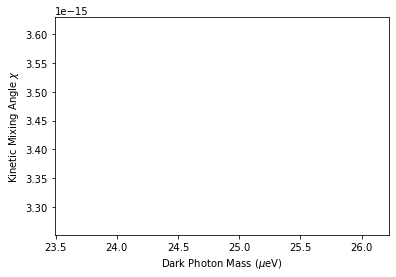

In [5]:
beta = 1 #cavity coupling coefficient
Lf = 1 # signal attenuation factor from data analysis
Vp = 11.8 #cm^3
Veff = Vp*ff #cm^3 #cavity volume times form factor
rho = 0.45 #GeV/cm^3 local dark matter density
#dt = 1.31e29 # 1/GeV 1 day
dt = 1.5e25 # 1/GeV 10s integration time
Q = 1e6 # quality factor. For now, min(DM halo Q, cavity loaded Q)
SNR = 3
Tn = 3.447e-15 #GeV #50 mK

chi_unpolarized = np.sqrt((SNR*(beta+1)*b_GeV*Tn)/(beta*ma*rho*Veff*Q*Lf))*(b_GeV*dt)**(-1/4)
chi_polarized = chi_unpolarized / np.sqrt(0.0025)*np.sqrt(1/3)
print(ma*1e9)
print(chi_unpolarized)
plt.plot(ma*1e15, chi_unpolarized)
plt.xlabel(r'Dark Photon Mass ($\mu$eV)')
plt.ylabel(r'Kinetic Mixing Angle $\chi$')
plt.show()

# How long would it take to scan?

In [6]:
Q_cav = 1e6 #not sure
delta_f = np.mean(freqs)/Q_cav # cavity bandwidth
Delta_f = 3e9 #3 GHz # total search bandwidth
total_time_days = Delta_f/delta_f*10*1.157e-5 #100 s per step
print('{} days to scan the entire frequency range'.format(total_time_days))

57.74413575112294 days to scan the entire frequency range


In [7]:
sql_Tn = constants.h*freqs/constants.k
Tc = 0.04 #50 mK
photon_counting_improvement = (Tc+sql_Tn)/Tc

In [8]:
print(photon_counting_improvement)

8.212062528501088


In [12]:
(constants.h*freqs/constants.k)*7.3e-4

0.00021059222583223177

In [13]:
freqs

6011000000.0

In [14]:
h = constants.h
k = constants.k
n = 7.3e-4

In [17]:
h*freqs/(k*np.log(1/n+1))

0.0399383473499868

In [18]:
f1 = 750e6;

In [19]:
f2 = 6.011e9
T1 = 0.2
T2 = 0.04

In [21]:
print(f1*h)
print(k*T1)

4.969552612499999e-25
2.7612980000000003e-24


In [22]:
print(f2*h)
print(k*T2)

3.982930767165e-24
5.522596e-25
